In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/clean/retail_clean.csv")
daily = pd.read_csv("../data/clean/daily_sales.csv")

print(df.head())
print(df.shape)

   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
(397884, 9)


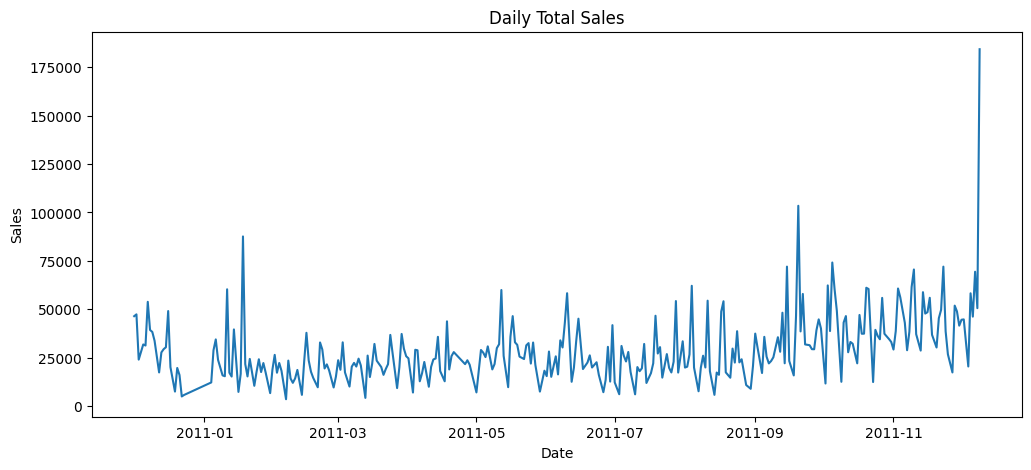

In [2]:
daily["Date"] = pd.to_datetime(daily["Date"])

plt.figure(figsize=(12,5))
plt.plot(daily["Date"], daily["TotalPrice"])
plt.title("Daily Total Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

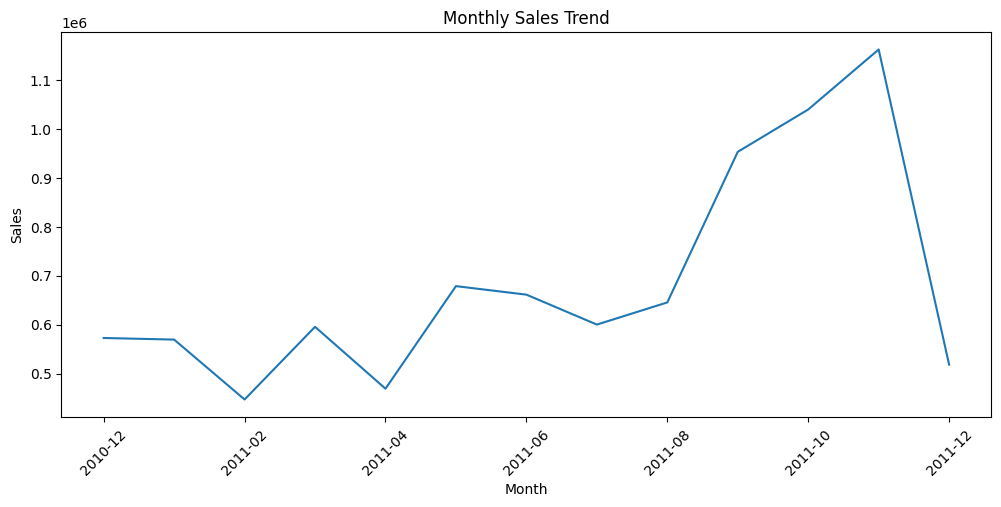

In [3]:
daily["Month"] = daily["Date"].dt.to_period("M").astype(str)
monthly = daily.groupby("Month")["TotalPrice"].sum()

plt.figure(figsize=(12,5))
monthly.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

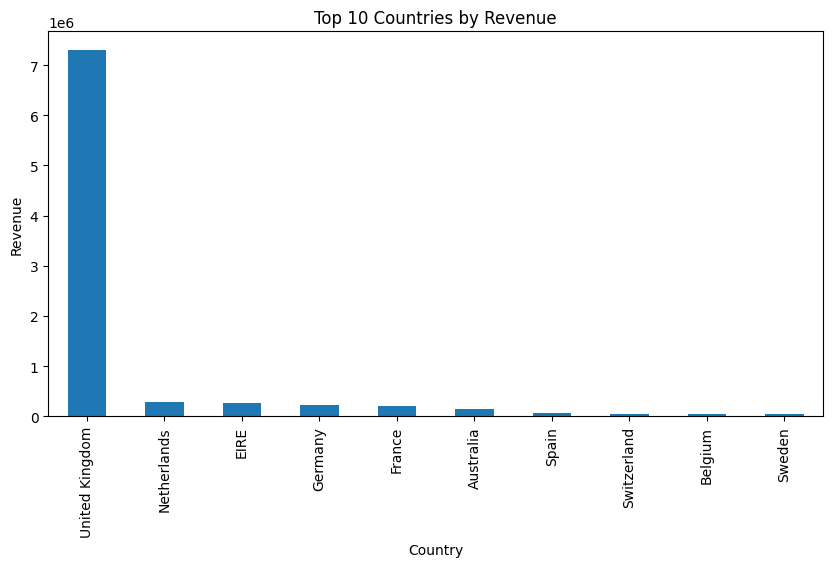

In [4]:
top_countries = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_countries.plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.show()

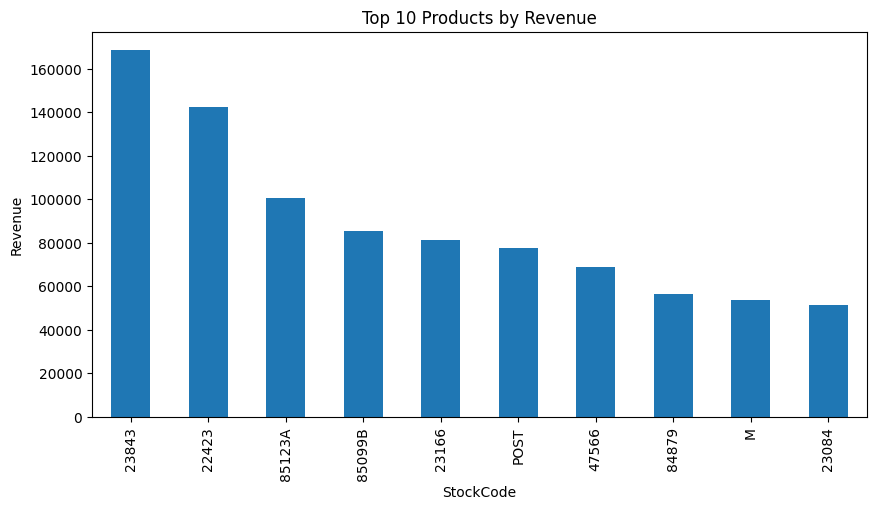

In [5]:
top_products = df.groupby("StockCode")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.show()

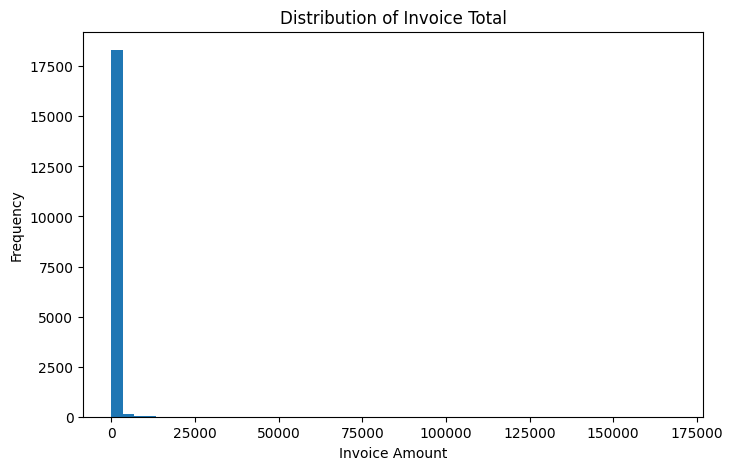

In [6]:
invoice_totals = df.groupby("InvoiceNo")["TotalPrice"].sum()

plt.figure(figsize=(8,5))
plt.hist(invoice_totals, bins=50)
plt.title("Distribution of Invoice Total")
plt.xlabel("Invoice Amount")
plt.ylabel("Frequency")
plt.show()